In [91]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv(r'csv\df.csv', parse_dates=['Date'])

In [93]:
df.head()

,Unnamed: 0,Date,Placement,Impressions,Clicks,Reach,Frequency,Audience ID,Country,Number,Provider
0,0,2023-08-12,DV360_CRM-1PD CRM_STANDARD BANNER_160x600_DCPM_INTEL CCF_STD_FY24Q3_d14s5u5pfra-test-reactfullaiqv2-1pcrm_FR CSB_AIQ,20.0,0.0,0.0,0.00,d14s5u5pfra,FR,2,AIQ
1,1,2023-08-12,DV360_CRM-1PD CRM_STANDARD BANNER_300x250_DCPM_INTEL CCF_STD_FY24Q3_d14s5u5pfra-test-reactfullaiqv2-1pcrm_FR CSB_AIQ,643.0,0.0,173.0,3.72,d14s5u5pfra,FR,2,AIQ
2,2,2023-08-12,DV360_CRM-1PD CRM_STANDARD BANNER_300x600_DCPM_INTEL CCF_STD_FY24Q3_d14s5u5pfra-test-reactfullaiqv2-1pcrm_FR CSB_AIQ,117.0,0.0,0.0,0.00,d14s5u5pfra,FR,2,AIQ
3,3,2023-08-12,DV360_CRM-1PD CRM_STANDARD BANNER_728x90_DCPM_INTEL CCF_STD_FY24Q3_d14s5u5pfra-test-reactfullaiqv2-1pcrm_FR CSB_AIQ,108.0,0.0,0.0,0.00,d14s5u5pfra,FR,2,AIQ
4,4,2023-08-13,DV360_CRM-1PD CRM_STANDARD BANNER_160x600_DCPM_INTEL CCF_STD_FY24Q3_d14s5u5pfra-test-reactfullaiqv2-1pcrm_FR CSB_AIQ,54.0,0.0,0.0,0.00,d14s5u5pfra,FR,2,AIQ


### France

In [94]:
df_fr = df[df['Country'].str.contains('FR')]

df_fr_reach = df_fr.groupby(['Date','Provider'])['Reach'].sum().reset_index()
df_fr_impressions = df_fr.groupby(['Date','Provider'])['Impressions'].sum().reset_index()
df_fr_frequency = df_fr.groupby(['Date','Provider'])['Frequency'].sum().reset_index()
df_fr_clicks = df_fr.groupby(['Date','Provider'])['Clicks'].sum().reset_index()

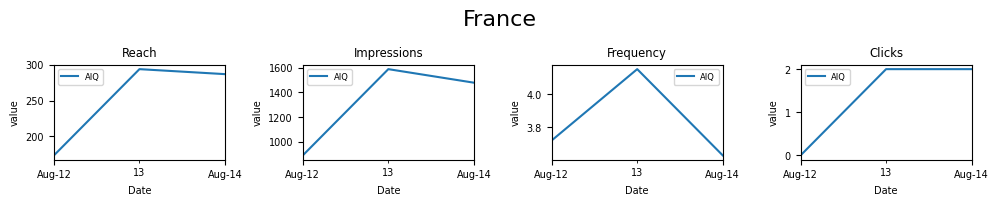

In [103]:
fig = plt.figure(figsize=(10,2))
fig.suptitle('France', fontsize=16)

# 2 rows, 2 columns
ax0 = fig.add_subplot(1, 4, 1)  
ax1 = fig.add_subplot(1, 4, 2)
ax2 = fig.add_subplot(1, 4, 3)
ax3 = fig.add_subplot(1, 4, 4)

df_fr_reach.pivot(index='Date', columns='Provider', values='Reach').plot(ax=ax0)
df_fr_impressions.pivot(index='Date', columns='Provider', values='Impressions').plot(ax=ax1)
df_fr_frequency.pivot(index='Date', columns='Provider', values='Frequency').plot(ax=ax2)
df_fr_clicks.pivot(index='Date', columns='Provider', values='Clicks').plot(ax=ax3)

ax0.set_title('Reach')
ax0.set_xlabel('Date')
ax0.set_ylabel('value')
ax0.legend(fontsize=6)

ax1.set_title('Impressions')
ax1.set_xlabel('Date')
ax1.set_ylabel('value')
ax1.legend(fontsize=6)

ax2.set_title('Frequency')
ax2.set_xlabel('Date')
ax2.set_ylabel('value')
ax2.legend(fontsize=6)

ax3.set_title('Clicks')
ax3.set_xlabel('Date')
ax3.set_ylabel('value')
ax3.legend(fontsize=6)


date_form = mdates.DateFormatter(fmt='%b-%d')
ax0.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)

plt.tight_layout()
plt.show()